<a href="https://colab.research.google.com/github/laduqueo/Senales_y_Sistemas/blob/main/parcial_1_SYS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PREGUNTAS

1. Se tiene un microprocesador de 5 bits con entrada análoga de $-3.3$ a $5$ [V]. Diseñe el sistema de acondicionamiento y digitalización para la señal:

$$x(t) = 20\sin\left(7t - \frac{\pi}{2}\right) - 3\cos(5t) + 2\cos(10t)$$

Presente las simulaciones y gráficas de los procedimientos más representativos en un cuaderno de Python, incluyendo al menos dos períodos de la señal estudiada.

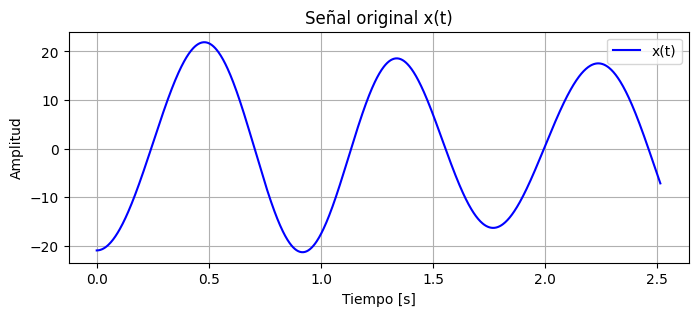

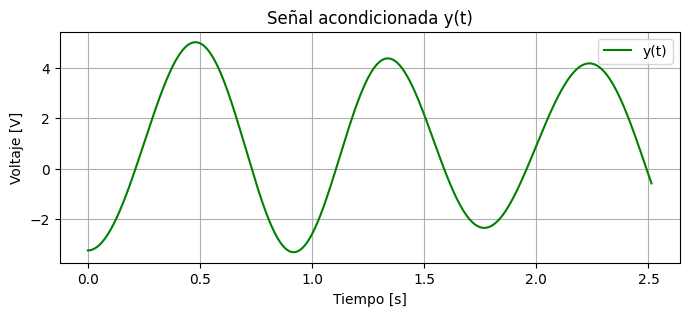

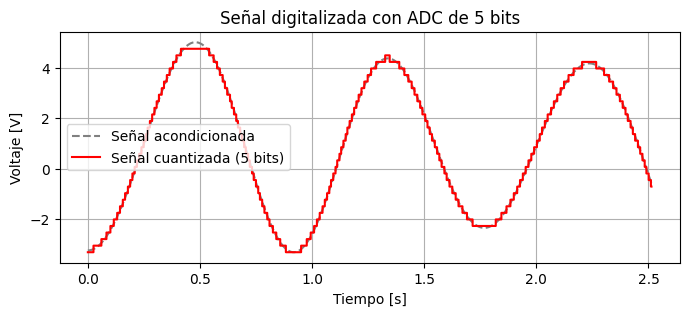

In [ ]:
import numpy as np #se importa la biblioteca para cálculos numéricos
import matplotlib.pyplot as plt #biblioteca para generar gráficos

T= (2*np.pi)/5 #periodo de la señal
t = np.linspace(0, 2*T, 1000) #en un rango de 0 a 2*T (deben ser al menos 2 periodos) se genera un array de 1000 puntos

# Señal original dada en el ejercicio
x = 20 * np.sin(7 * t - np.pi / 2) - 3 * np.cos(5 * t) + 2 * np.cos(10 * t)

# Graficamos la señal original
plt.figure(figsize=(8, 3)) #la figura aumentará su tamaño (largo*alto), en este caso 8 pulgas de largo por 3 de alto
plt.plot(t, x, label='x(t)', color='blue') #grafica la señal de x en funcion del tiempo t, el x(t) es la etiqueta para la leyenda y ¨color¨ asigna el color azul a la linea
plt.title('Señal original x(t)') #título de la gráfica
plt.xlabel('Tiempo [s]') #etiqueta para el eje x
plt.ylabel('Amplitud') #etiqueta para el eje y
plt.grid(True) #activa la cuadricula de la gráfica
plt.legend() #muestra la leyenda
plt.show() #muestra la figura en la pantalla


# Acondicionamiento de acuerdo a la transformación lineal realizada
ymax = 5 #valor maximo del voltaje pedido
ymin = -3.3 #valor mínimo del voltaje pedido
xmax = np.max(x) #valor maximo de amplitud de la señal original
xmin = np.min(x) #valor minimo de amplitud de la señal original
m = (ymax - ymin) / (xmax - xmin) #formula de la pendiente
b = ymin - m * xmin #formula de b
y = m * x + b #ecuación acondicionada

# Graficamos la señal acondicionada
plt.figure(figsize=(8, 3)) #la figura aumentará su tamaño (largo*alto), en este caso 8 pulgas de largo por 3 de alto
plt.plot(t, y, label='y(t)', color='green') #grafica la señal de y en función del tiempo t, el y(t) es la etiqueta para la leyenda y ¨color¨ asigna el color verde a la linea
plt.title('Señal acondicionada y(t)') #titulo de la gráfica
plt.xlabel('Tiempo [s]') #etiqueta para el eje x
plt.ylabel('Voltaje [V]') #etiqueta para el eje y
plt.grid(True) #activa la cuadricula de la gráfica
plt.legend() #muestra la leyenda
plt.show() #muestra la figura en la pantalla


# Digitalización (ADC de 5 bits)
niveles = 2**5 #niveles de cuantizacion para representar los 5 bits
delta = (ymax - ymin) / niveles #calcula la cuantizacion, lo que indica el tamaño de cada intervalo

# Cuantización
y_cuant = np.round((y - ymin) / delta) #para cada valor de y(t), se calcula al nivel al que corresponde
y_cuant = np.clip(y_cuant, 0, niveles - 1) #asegura que los niveles esten dentro del rango permitido, desde el 0 al 31 dado que son 32 niveles
y_digital = y_cuant * delta + ymin  #convierte los numeros enteros (niveles) a voltajes

# Graficar señal digitalizada
plt.figure(figsize=(8, 3)) #la figura aumentará su tamaño (largo*alto), en este caso 8 pulgas de largo por 3 de alto
plt.plot(t, y, label='Señal acondicionada', linestyle='--', color='gray') #grafica la señal de y en función del tiempo t, el label es la etiqueta para la leyenda, linestyle permite ver una linea punteada y ¨color¨ asigna el color gris a la linea punteada
plt.step(t, y_digital, label='Señal cuantizada (5 bits)', color='red') #se dibuja una línea por escalones de la señal reconstruida, esta será de color rojo
plt.title('Señal digitalizada con ADC de 5 bits') #titulo de la grafica
plt.xlabel('Tiempo [s]') #etiqueta para el eje x
plt.ylabel('Voltaje [V]') #etiqueta para el eje y
plt.grid(True) #activa la cuadricula de la gráfica
plt.legend() #muestra la leyenda
plt.show() #muestra la figura en la pantalla


2. ¿Cuál es la señal obtenida en tiempo discreto al utilizar un conversor análogo-digital con frecuencia de muestreo de 5~kHz, aplicado a la señal

$$x(t) = 3 \cos(1000\pi t) + 5 \sin(2000\pi t) + 10 \cos(11000\pi t)?$$
Realizar la simulación del proceso de discretización. En caso de que la discretización no sea apropiada, diseñe e implemente un conversor adecuado para la señal estudiada.


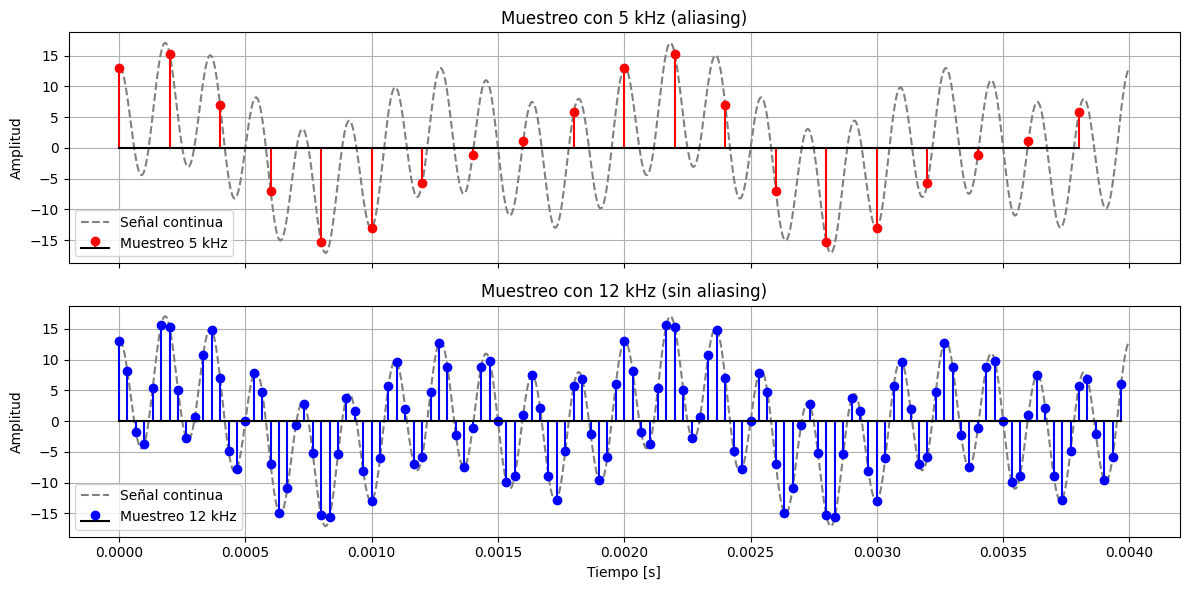

In [ ]:
import numpy as np #se importa la biblioteca para cálculos numéricos
import matplotlib.pyplot as plt #biblioteca para generar gráficos

wmin = 1000 * np.pi  # frecuencia angular mínima
T = 2 * np.pi / wmin  # período fundamental

t_cont = np.linspace(0, 2*T, 1000) #en un rango de 0 a 2*T (deben ser al menos 2 periodos) se genera un array de 1000 puntos
x_cont = 3 * np.cos(1000 * np.pi * t_cont) + 5 * np.sin(2000 * np.pi * t_cont) + 10 * np.cos(11000 * np.pi * t_cont) #en la señal original se evalua t_cont (cada valor de tiempo)

# fs = 5 kHz
fs1 = 5000  # frecuencia de muestreo en Hz
Ts1 = 1 / fs1 #periodo de acuerdo a la frecuencia de muestreo

# instantes de muestreo
t_disc1 = np.arange(0, 2*T, Ts1) #Genera el vector de tiempo discreto t_disc1, que contiene los instantes en los que se va a muestrear la señal continua.
x_disc1 = 3 * np.cos(1000 * np.pi * t_disc1) + 5 * np.sin(2000 * np.pi * t_disc1) +  10 * np.cos(11000 * np.pi * t_disc1) #Evalúa la señal original (𝑡) x(t) en los puntos del vector t_disc1, para obtener la señal muestreada.

#Caso 2: Muestreo con fs = 30 kHz (sin aliasing)
fs2 = 30000
Ts2 = 1 / fs2
t_disc2 = np.arange(0, 2*T, Ts2)
x_disc2 = 3 * np.cos(1000 * np.pi * t_disc2) + 5 * np.sin(2000 * np.pi * t_disc2) + 10 * np.cos(11000 * np.pi * t_disc2)

# ----- Gráficas -----
fig, axs = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# --- Gráfica 1: fs = 5 kHz (aliasing) ---
axs[0].plot(t_cont, x_cont, label='Señal continua', color='gray', linestyle='--')
axs[0].stem(t_disc1, x_disc1, linefmt='r-', markerfmt='ro', basefmt='k', label='Muestreo 5 kHz')
axs[0].set_title('Muestreo con 5 kHz (aliasing)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid(True)

# --- Gráfica 2: fs = 12 kHz (sin aliasing) ---
axs[1].plot(t_cont, x_cont, label='Señal continua', color='gray', linestyle='--')
axs[1].stem(t_disc2, x_disc2, linefmt='b-', markerfmt='bo', basefmt='k', label='Muestreo 12 kHz')
axs[1].set_title('Muestreo con 12 kHz (sin aliasing)')
axs[1].set_xlabel('Tiempo [s]')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

3. La distancia media entre dos señales $x_1(t), x_2(t) \in \mathbb{R}, \mathbb{C}$, se puede expresar a partir de la potencia media:

$$
d(x_1, x_2) = \overline{P}_{x_1 - x_2} = \lim_{T \to \infty} \frac{1}{T} \int_0^T |x_1(t) - x_2(t)|^2 \, dt.
$$

Sean $x_1(t)$ y $x_2(t)$:

$x_1(t) = A \cos(\omega_0 t), \quad \omega_0 = \frac{2\pi}{T},  T, A \in \mathbb{R}^+$

$x_1(t) = A \cos(\omega_0 t), \quad \omega_0 = 2\pi$

$$
x_2(t) =
\begin{cases}
1 & \text{si } 0 \leq t < \frac{T}{4} \\
-1 & \text{si } \frac{T}{4} \leq t < \frac{3T}{4} \\
1 & \text{si } \frac{3T}{4} \leq t < T
\end{cases}
$$

¿Cuál es la distancia media entre las señales?. Corrobore sus
 desarrollos con Sympy.


# Cálculo de la distancia media entre dos señales periódicas

Se calculan la distancia media entre las señales:

- \( x_1(t) = A \cos\left(\frac{2\pi}{T} t\right) \)
- \( x_2(t) \) es una señal periódica a trozos con valores 1, -1, 1 en tres tramos de duración \( \frac{T}{4} \), \( \frac{T}{2} \), y \( \frac{T}{4} \) respectivamente.

La distancia se calcula como:

$$d(x_1, x_2) = \frac{1}{T} \int_0^T \left(x_1(t) - x_2(t)\right)^2 dt$$


In [ ]:
import sympy as sp

# Definimos variables simbólicas
t, T, A = sp.symbols('t T A', real=True, positive=True)

# Frecuencia angular
omega0 = 2 * sp.pi / T

# Señales
x1 = A * sp.cos(omega0 * t)

# Definimos x2 a trozos
x2 = sp.Piecewise(
    (1, (t >= 0) & (t < T/4)),
    (-1, (t >= T/4) & (t < 3*T/4)),
    (1, (t >= 3*T/4) & (t < T))
)

# Diferencia al cuadrado
diff_squared = sp.simplify((x1 - x2)**2)
diff_squared

# Definimos los tramos de integración
I1 = sp.integrate((x1 - 1)**2, (t, 0, T/4))
I2 = sp.integrate((x1 + 1)**2, (t, T/4, 3*T/4))
I3 = sp.integrate((x1 - 1)**2, (t, 3*T/4, T))

# Distancia media
d = (I1 + I2 + I3) / T
d_simplificada = sp.simplify(d)
d_simplificada



A**2/2 - 4*A/pi + 1

4. ¿Cómo se pueden calcular los coeficientes $a_n$ y $b_n$ desde $x''(t)$ en la serie trigonométrica de Fourier?.

Encuentre el espectro de Fourier, su magnitud, fase, parte real, parte imaginaria y el error relativo de reconstrucción para $n \in \{0, \pm1, \pm2, \pm3, \pm4, \pm5\}$, a partir de $x''(t)$ para la señal $x(t)$ en la Figura 1. Compruebe el espectro obtenido con la estimación a partir de $x(t)$ y presente las respectivas simulaciones sobre Python.

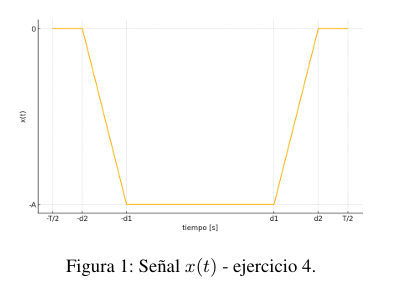